# Understanding ANN
## Problem Statement
Here we are using wine data to predict the quality of wine.

## Import libraries

In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

## Processing data

In [51]:
#  Import data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url, delimiter=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [52]:
X = wine.drop("quality", axis=1).values
y= wine["quality"].values

In [53]:
# Convert the target variable to binary class (good quality: 6 and above, bad quality: below 6)
y = (y >= 6).astype(int)

In [54]:
# Split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [55]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model building

In [56]:
#Build the model
model = Sequential()

In [57]:
# Add layers (input, hidden and output)
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [58]:
# Compile model
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## Training model

In [59]:
history = model.fit(X_train, 
                    y_train, 
                    epochs= 50,
                    batch_size= 10,
                    validation_data=(X_test, y_test))

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5672 - loss: 0.6882 - val_accuracy: 0.6719 - val_loss: 0.6370
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7459 - loss: 0.5822 - val_accuracy: 0.7188 - val_loss: 0.5971
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7551 - loss: 0.5494 - val_accuracy: 0.7250 - val_loss: 0.5856
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7674 - loss: 0.5020 - val_accuracy: 0.7281 - val_loss: 0.5813
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7507 - loss: 0.5084 - val_accuracy: 0.7281 - val_loss: 0.5794
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7668 - loss: 0.5017 - val_accuracy: 0.7188 - val_loss: 0.5831
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7547 - loss: 0.5137 - val_accuracy: 0.7188 - val_loss: 0.5800
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7698 - loss: 0.4902 - val_accuracy: 0.

In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 773 (3.02 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 516 (2.02 KB)

## Model evaluation

In [61]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accouracy: {accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7312 - loss: 0.5467  
Test accouracy: 0.721875011920929


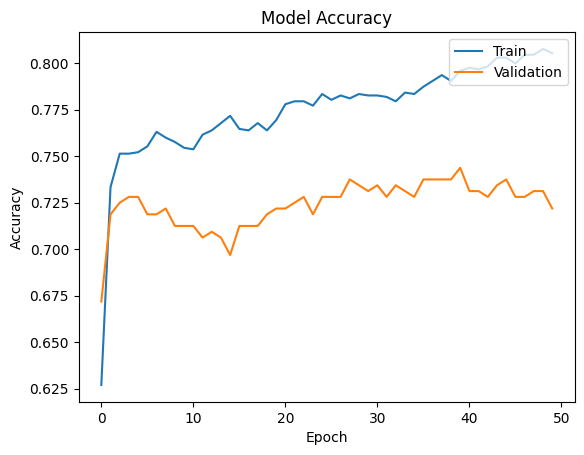

In [62]:
# Plot the training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


## Classification report

In [63]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       132
           1       0.79      0.72      0.75       188

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.73      0.72      0.72       320

